In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
from diffusion import init_pipe, process_depth_map, depth_pipe
from PIL import Image

/home/jorge/miniconda3/envs/thesis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipe = depth_pipe('cuda:0')

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:01,  2.64it/s]/home/jorge/miniconda3/envs/thesis/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.17it/s]


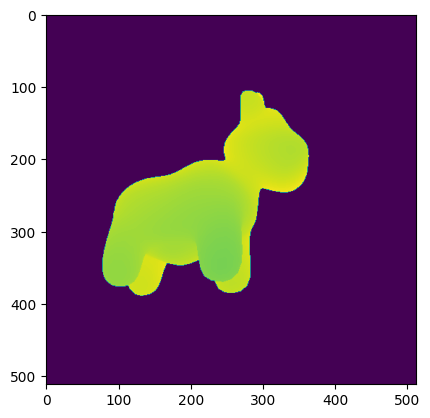

In [30]:
image = torch.load('data/render.pt')
depth = torch.load('data/depth.pt')

plt.imshow(image[0])
plt.imshow(depth[0])

In [31]:
from einops import rearrange

img_pipe = (rearrange(image, 'b h w c -> b c h w')[:, 0:3, :, :]).float()
depth_pipe = (rearrange(depth, 'b h w 1 -> b h w') * 255).float()

print(img_pipe.shape, img_pipe.dtype)
print(depth_pipe.shape, img_pipe.dtype)

torch.Size([1, 3, 512, 512]) torch.float32
torch.Size([1, 512, 512]) torch.float32


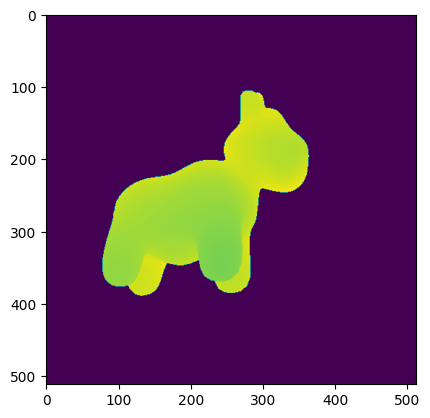

In [32]:
plt.imshow(img_pipe[0].permute(1,2,0))
plt.imshow(depth_pipe[0])

In [33]:
pipe(
    prompt='cow',
    image=img_pipe,
    control_image=depth_pipe
)

/home/jorge/miniconda3/envs/thesis/lib/python3.9/site-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `vae_latent_channels` directly via 'VaeImageProcessor' object attribute is deprecated. Please access 'vae_latent_channels' over 'VaeImageProcessor's config object instead, e.g. 'scheduler.config.vae_latent_channels'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
  0%|          | 0/40 [00:00<?, ?it/s]


RuntimeError: expected scalar type Half but found Float